# Plotting Location Data using Contextily and Geopandas

/Users/zacannon-m3/Desktop/CSCI385/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/ds/9qvn6lj53sd1nw_tmbk4q0cm0000gn/T/ipykernel_55248/251356946.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_types))  # Get a color map


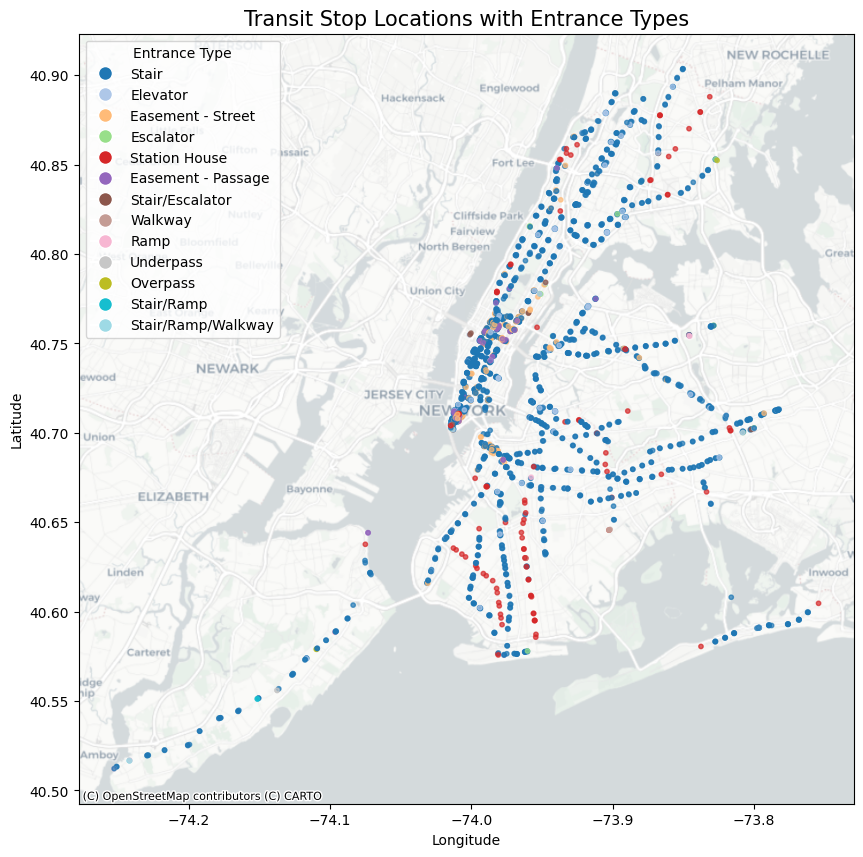

In [1]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import numpy as np

# Step 1: Load data
df = pd.read_csv("mta-datasets/MTA_Subway_Entrances_and_Exits__2024_20241217.csv")

# Step 2: Get necessary values
df.dropna(subset=['Entrance Latitude', 'Entrance Longitude'], inplace=True)

# Step 3: Assign colors based on 'Entrance Type' column
unique_types = df['Entrance Type'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_types))  # Get a color map
entrance_type_color_map = dict(zip(unique_types, colors(range(len(unique_types)))))

# Step 4: Add a new 'color' column to the DataFrame based on 'Entrance Type'
df['color'] = df['Entrance Type'].map(entrance_type_color_map)

# Step 5: Create a plot with the map
fig, ax = plt.subplots(figsize=(10, 10))

# Step 6: Plot the points using Latitude and Longitude, color by Entrance Type
scatter = ax.scatter(df['Entrance Longitude'], df['Entrance Latitude'], c=df['color'], s=10, alpha=0.7)

# Step 7: Add base map based upon coordinates in the dataset
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

# Step 8: Add a legend
handles, labels = [], []
for entrance_type, color in entrance_type_color_map.items():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(entrance_type)
ax.legend(handles=handles, labels=labels, title="Entrance Type", loc='upper left')

# Step 9: Customize titles and labels
ax.set_title('Transit Stop Locations with Entrance Types', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


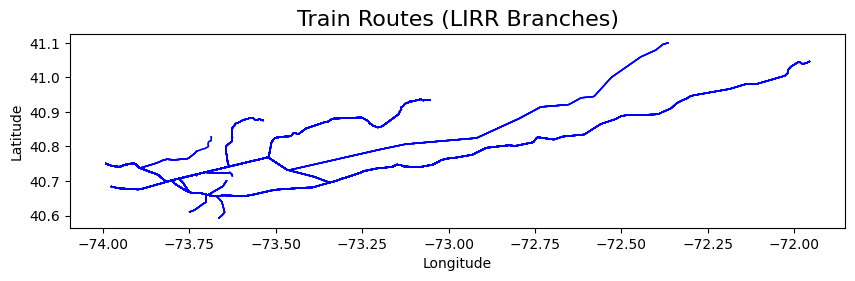

In [2]:
import geopandas as gpd
from shapely import wkt

df = pd.read_csv("mta-datasets/MTA_LIRR_Branches_20241218.csv")

# Convert the WKT column to shapely geometries
df['geometry'] = df['the_geom'].apply(wkt.loads)

# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

import matplotlib.pyplot as plt

# Plot the geometries
gdf.plot(figsize=(10, 10), edgecolor='blue', linewidth=1)

# Add a title and labels
plt.title('Train Routes (LIRR Branches)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



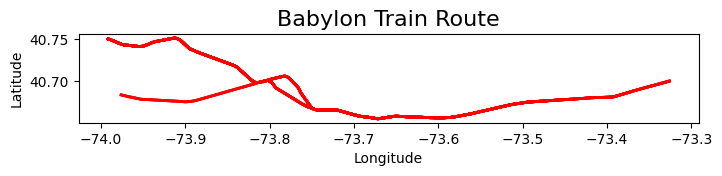

In [3]:
# Filter the data for Babylon route
babylon_route = gdf[gdf['ROUTENAME'] == 'Babylon']

# Plot only the Babylon route
babylon_route.plot(figsize=(8, 8), edgecolor='red', linewidth=2)

# Add a title and labels
plt.title('Babylon Train Route', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [4]:
# Calculate the length of each route 
gdf['route_length'] = gdf['geometry'].length

# Convert to meters
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs(epsg=3857)
gdf['route_length'] = gdf['geometry'].length

print(gdf[['ROUTENAME', 'route_length']].head())



  ROUTENAME  route_length
0   Babylon  82310.794538
1   Babylon  82310.794538
2   Babylon  80846.969496
3   Babylon  78029.241155
4   Babylon  78029.241155
